# Simple Linear Regression Example: House Price Prediction

This project aims to predict the price of a house based on its area using simple linear regression. The dataset used in this project consists of 1000 houses in Monroe Township, New Jersey, and their respective areas and prices. Here house price is a dependent variable and the area of the house is the independent variable.

The data is stored in a CSV file named `house-prices.csv`.

In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore

import matplotlib.pyplot as plt # type: ignore
%matplotlib inline

from sklearn import linear_model # type: ignore

# import warnings
# warnings.filterwarnings('ignore', message='X does not have valid feature names')

In [4]:
df = pd.read_csv("house-prices.csv")
df

,area,price
0,1567,177067.50
1,3345,511748.20
2,3722,404096.67
3,2783,357916.31
4,2949,362409.54
...,...,...
995,3442,434336.51
996,1530,211400.14
997,2102,172513.03
998,1551,200701.84


In [5]:
# df["price"] = df["price"].astype(int)
# df

In [6]:
df.dtypes

,0
area,int64
price,float64


We can create a scatter plot of available prices and areas where the red points represents the available data points. Then we can draw a linear regression line which best fits these data points.

Once we have this line then we can simply predict the price of a house given any area by simply drawing a horizontal and vertical line and the intersection of the linear regression line with the vertical line will give us the point on the y-axis which will be our predicted price of that house.

Text(0, 0.5, 'Price (in $)')

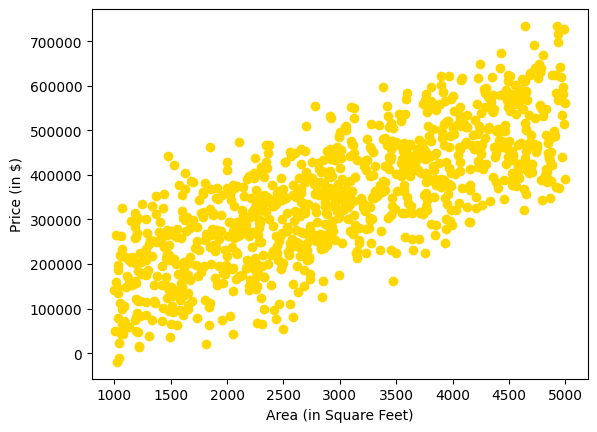

In [7]:
plt.scatter(df["area"], df["price"], color="gold")
plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

By looking at the scatter plot we get an idea that the distribution is suitable for the linear regression model and hence we will go ahead and use the linear regression model. First we create a linear regression object. From sci-learn module we have already imported the linear model.

Fitting the data means that we are training the linear regression model using the available data points.

The first argument has to be like a 2d array and we can supply here our data frame which only contains area. The second argument is the y-axis on our plot which is our house price.

In [8]:
reg_obj = linear_model.LinearRegression()
reg_obj.fit(df[["area"]], df["price"])

LinearRegression()

`If you see the Do not match the feature names error`

The warning message you are seeing indicates that the feature names in your input data (X) do not match the feature names used to fit the LinearRegression model.

This can happen if you have modified the feature names in the input data after fitting the model, or if the input data does not have feature names at all.

While this warning message is not critical and does not necessarily mean that your predictions are incorrect, it is generally a good practice to ensure that the feature names in your input data match the feature names used to fit the model.

To resolve this warning message, you can pass a DataFrame with the same feature names as used to fit the model, or you can re-fit the model with the new feature names.

In [9]:
df2 = pd.DataFrame({"area": df["area"]})
df2

,area
0,1567
1,3345
2,3722
3,2783
4,2949
...,...
995,3442
996,1530
997,2102
998,1551


In [10]:
predicted_arr = reg_obj.predict(df2)

print(predicted_arr[:10], end=", ")
print("...", end=", ")
print(predicted_arr[-10:])

[212322.90487091 384074.21961441 420491.68061458 329786.12125342
 345821.39585827 405712.18052698 266417.80715232 360600.89594587
 484342.98491461 276657.19936988], ..., [378857.92546585 212709.29703006 416724.35706284 393251.0333943
 468597.50442913 393444.22947387 208748.77739874 264002.85615762
 210777.33623429 470915.85738405]


In [11]:
m = reg_obj.coef_ # ouputs the value of slope(m)
m

array([96.59803979])

In [12]:
c = reg_obj.intercept_ # outputs the value of intercept(c)
c

60953.77652271959

In [13]:
x = df2.to_numpy(df["area"])

In [14]:
# y = m * x + c

using_formula_arr = np.empty(1000)
for i in range(len(x)):
    using_formula_arr[i] = m * x[i] + c
#     print(m * x[i] + c, end=", ")

print(using_formula_arr[:10], end=", ")
print("...", end=", ")
print(using_formula_arr[-10:])

[212322.90487091 384074.21961441 420491.68061458 329786.12125342
 345821.39585827 405712.18052698 266417.80715232 360600.89594587
 484342.98491461 276657.19936988], ..., [378857.92546585 212709.29703006 416724.35706284 393251.0333943
 468597.50442913 393444.22947387 208748.77739874 264002.85615762
 210777.33623429 470915.85738405]


<ipython-input-14-c4596d92a633>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  using_formula_arr[i] = m * x[i] + c


In [15]:
np.array_equal(predicted_arr, using_formula_arr)

True

In [16]:
df["predicted_price"] = predicted_arr
display(df)

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234


Text(0, 0.5, 'Price (in $)')

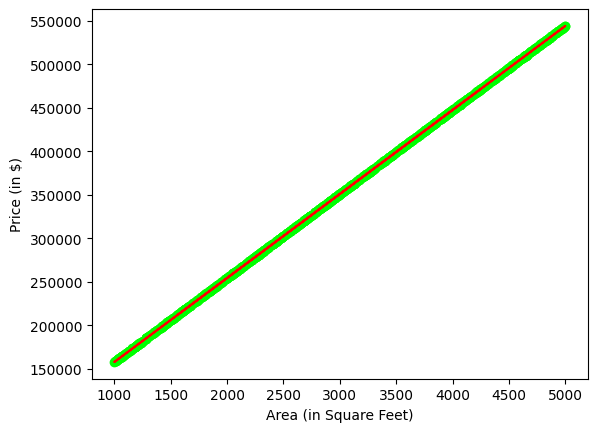

In [17]:
plt.plot(df["area"], df["predicted_price"], color="red")
plt.scatter(df["area"], df["predicted_price"], color="lime")

plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

Why we choose the linear regression line(the red line in this example)?

This is because when we calculate the error which the vertical distance between the actual price and the predicted price (predicted by the linear equation) we square individual errors and we sum them up and we minimise this sum value. We do this for all the other line and we found that the red line was giving me the minimum sum value.

Text(0, 0.5, 'Price (in $)')

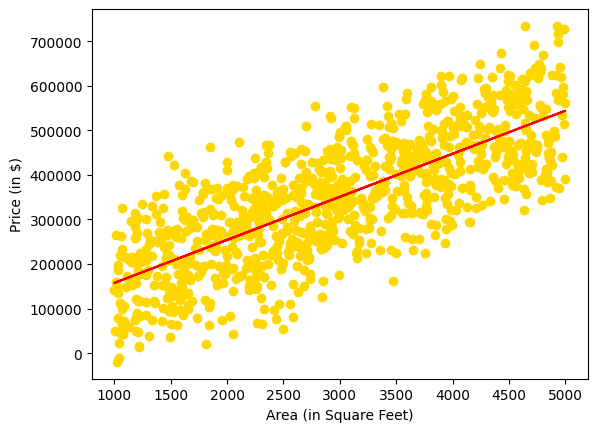

In [18]:
plt.scatter(df["area"], df["price"], color="gold")
plt.plot(df["area"], df["predicted_price"], color="red")

plt.xlabel("Area (in Square Feet)")
plt.ylabel("Price (in $)")

In [19]:
display(df)
print(df.dtypes)

,area,price,predicted_price
0,1567,177067.50,212322.904871
1,3345,511748.20,384074.219614
2,3722,404096.67,420491.680615
3,2783,357916.31,329786.121253
4,2949,362409.54,345821.395858
...,...,...,...
995,3442,434336.51,393444.229474
996,1530,211400.14,208748.777399
997,2102,172513.03,264002.856158
998,1551,200701.84,210777.336234


area                 int64
price              float64
predicted_price    float64
dtype: object
